In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from myfunc import timer
from myfunc import DirMan
import config

resolution     = config.resolution
name           = config.name
region         = config.region
data_path      = config.data_path
post_data_path = config.post_data_path
shp_path       = config.shp_path
fig_path       = config.fig_path

pd.set_option('display.max_columns', None)

    number  Field  gNATSGO  SoilGrids250m  SoilGrids250m_rev   Pelletier  Name
0      1.0   45.0     90.0           1260          40.378757   100.00000   1.0
1      2.0   62.0     51.0            743          19.083172   100.00000   2.0
2      3.0   81.0      0.0           1304          37.092320   100.00000   3.0
3      4.0   25.0     29.0           1637          50.862713     0.00000   4.0
4      5.0   32.0     23.0           1136          33.726030   100.00000   5.0
5      6.0   20.0    201.0            908          26.072554  4101.50200   6.0
6      7.0   10.0    201.0           1726          58.232480  5000.00000   7.0
7      8.0   81.0      0.0           1304          37.092320   100.00000   8.0
8      9.0   35.0     29.0           1637          50.862713     0.00000   9.0
9     10.0   13.0    201.0           3193         112.300280  1700.00000  10.0
10    11.0   43.0     41.0           1179          35.849228   400.37552  11.0
11    12.0   55.0     75.0            934          2

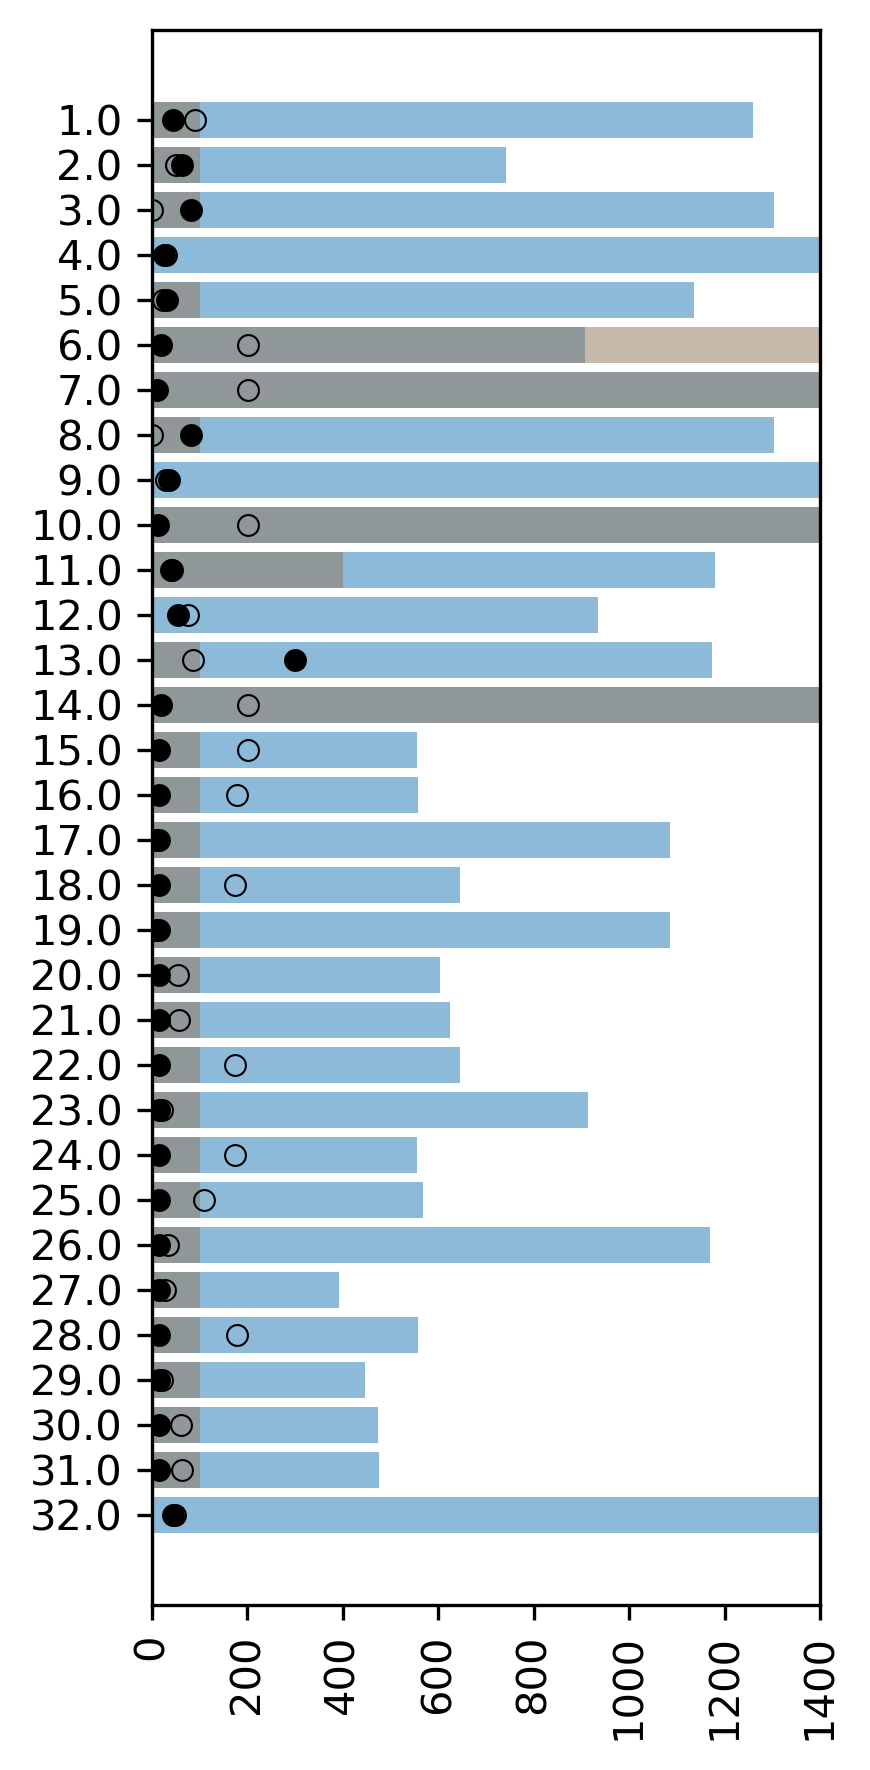

In [6]:
roots = pd.read_csv(f'/tera11/zhwei/students/Xionghui/data/run/0p1_exp1/csv/DTB.csv', encoding='latin-1')
roots

barplot = pd.DataFrame()
barplot = roots[['number','Field','gNATSGO','SoilGrids250m','SoilGrids250m_rev','Pelletier']].copy()
#barplot = barplot.dropna()
barplot['Name'] = (barplot['number']).astype(str) # make name column string

# barplot = barplot[0:20]
barplot = barplot.sort_values(by = 'number')
barplot = barplot.dropna()
print(barplot)

# Make labels for X-axis to have accurate Ssoil and Dbedrock meanings
# soillabels = list(np.arange(150, -50, step=-50))
dlabels = list(np.arange(0, 1600, step=200))
# labels = soillabels + dlabels
labels = dlabels

# Plot figure
plt.figure(figsize = (3, 6), dpi=300)
#plt.barh(barplot['Name'],barplot['Mean_D_bedrock_mm'], xerr = barplot['Stdev_D_bedrock_mm'], alpha=0.5, ecolor='black', capsize=3)
plt.barh(barplot['Name'],barplot['SoilGrids250m'], alpha=0.5, ecolor='black', capsize=3)
plt.barh(barplot['Name'],barplot['Pelletier'], color = '#91755a',alpha=0.5)

plt.plot(barplot['Field'],barplot['Name'], 'o', ms=5, markerfacecolor="black", markeredgecolor='black', markeredgewidth=0.5)
plt.plot(barplot['gNATSGO'],barplot['Name'],'o', ms=5, markerfacecolor="None", markeredgecolor='black', markeredgewidth=0.5)

# plt.xticks(np.arange(-150, 2050, step=50), labels = labels)
plt.xticks(np.arange(0, 1600, step=200), labels = labels)

# plt.xlim(-150, 2000)
plt.xlim(0, 1400)
plt.gca().invert_yaxis()
plt.xticks(rotation=90)
plt.tight_layout()

## Uncomment for downloading fig
plt.rcParams['pdf.fonttype'] = 42
plt.savefig(f"{fig_path}/h1_fDTB.pdf", transparent=True)

In [19]:
## Extract Columns for Barplot (NOTE: Must exclude first header row manually)
roots = pd.read_csv(f'/tera11/zhwei/students/Xionghui/data/run/0p1_exp1/csv/site.csv', encoding='latin-1')
print(roots)
roots = roots[roots['Sbedrock_field_min'] > 0]
roots = roots.sort_values(by=['lon', 'lat']).reset_index(drop=True)
barplot = pd.DataFrame()
barplot = roots.copy()
print(barplot)
barplot

    Unnamed: 0        lat         lon Measure  Sbedrock_field_min  \
0            0 -34.300000   19.150000       N                 NaN   
1            1 -32.338300  116.090400       N                 NaN   
2            2 -30.412800   18.249700       N                 NaN   
3            3  11.730000   76.450000       Y                 NaN   
4            4  20.815556  -89.245000       Y                 NaN   
..         ...        ...         ...     ...                 ...   
69          69  46.000000    4.500000       N                 NaN   
70          70  48.666111   14.707778       N                 NaN   
71          71  48.978611   13.811944       N                 NaN   
72          72  49.359722   18.383333       N                 NaN   
73          73  55.500000 -132.700000       N                 NaN   

    Sbedrock_field_max    Sbedrock       Ssoil  Soil_depth          DTB  \
0                  NaN  174.380550   64.498314        60.0    74.887535   
1                  Na

,Unnamed: 0,lat,lon,Measure,Sbedrock_field_min,Sbedrock_field_max,Sbedrock,Ssoil,Soil_depth,DTB,mask1,mask2,mask3,mask,num
0,54,39.7273,-123.6433,Y,140.0,420.0,290.32007,152.596080,45.0,124.930670,NaN,1.0,1.0,NaN,54
1,51,39.5745,-123.4770,Y,37.0,173.0,320.58330,99.357370,NaN,100.000000,1.0,1.0,1.0,1.0,51
2,44,37.0879,-119.2505,Y,44.0,270.0,370.55444,82.869640,NaN,100.000000,1.0,1.0,1.0,1.0,44
3,41,35.9570,-118.6300,Y,135.0,380.0,434.33770,63.236490,75.0,74.929820,1.0,1.0,NaN,NaN,41
4,32,33.4517,-117.1735,Y,120.0,120.0,220.45953,40.271910,62.0,50.078670,1.0,1.0,NaN,NaN,32
5,36,33.8100,-116.6800,Y,394.0,406.0,109.36027,19.182775,35.0,24.929976,1.0,0.0,1.0,NaN,36
6,12,29.8500,-98.4900,Y,999.0,999.0,308.05136,104.886410,32.0,124.976830,NaN,1.0,1.0,NaN,12
7,14,29.9400,-98.1200,Y,999.0,999.0,144.50522,82.507030,NaN,100.000000,1.0,1.0,1.0,1.0,14


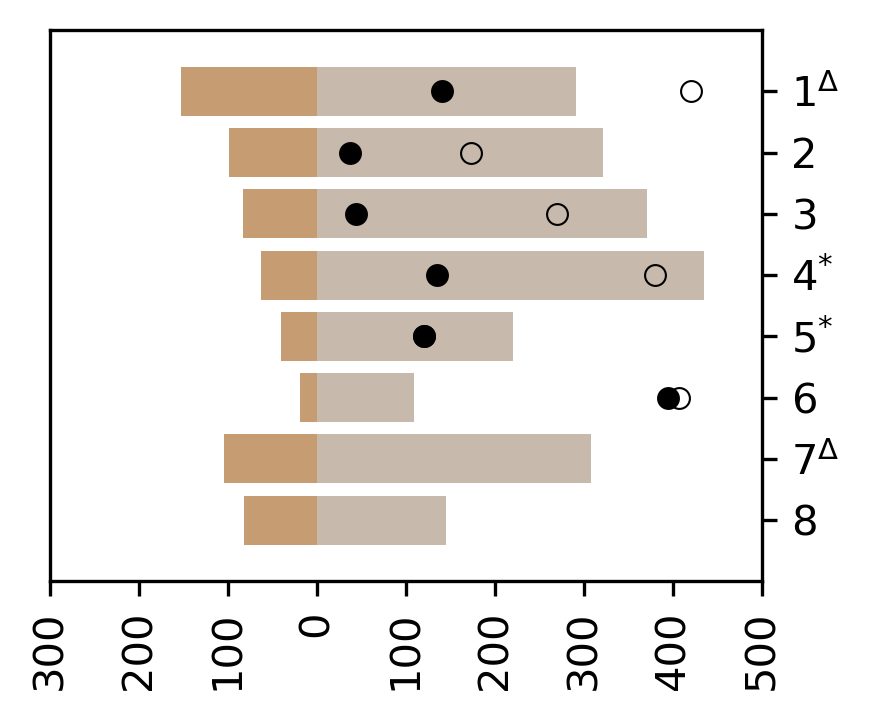

In [20]:

#barplot = barplot.dropna()
barplot['Ssoil'] = barplot['Ssoil'] * -1
barplot['Name'] = np.arange(1,9,1)

# barplot = barplot[0:20]
# barplot = barplot.sort_values(by = 'Number_For_Plotting')
# print(barplot)

# Make labels for X-axis to have accurate Ssoil and Dbedrock meanings
soillabels = list(np.arange(300, -100, step=-100))
dlabels = list(np.arange(100, 600, step=100))
labels = soillabels + dlabels

# Plot figure
plt.figure(figsize = (3, 2.5), dpi=300)
#plt.barh(barplot['Name'],barplot['Mean_D_bedrock_mm'], xerr = barplot['Stdev_D_bedrock_mm'], alpha=0.5, ecolor='black', capsize=3)
plt.barh(barplot['Name'],barplot['Ssoil'], alpha=0.5, ecolor='black', capsize=3)
plt.barh(barplot['Name'],barplot['Ssoil'], alpha=0.5, ecolor='red', capsize=3)

plt.barh(barplot['Name'],barplot['Sbedrock'], color = '#91755a',alpha=0.5)

plt.plot(barplot['Sbedrock_field_min'],barplot['Name'], 'o', ms=5, markerfacecolor="black", markeredgecolor='black', markeredgewidth=0.5)
plt.plot(barplot['Sbedrock_field_max'],barplot['Name'],'o', ms=5, markerfacecolor="None", markeredgecolor='black', markeredgewidth=0.5)

# plt.xticks(np.arange(-150, 2050, step=50), labels = labels)
# plt.xticks(np.arange(0, 1600, step=200), labels = labels)
yticks = ['$1^{{Δ}}$','2','3','$4^{{*}}$','$5^{{*}}$','6','$7^{{Δ}}$','8']
plt.ylim(0, 9)
plt.yticks(np.arange(1, 9, 1), labels = yticks)
plt.xticks(np.arange(-300, 600, step=100), labels = labels)
plt.xlim(-300, 500)
plt.gca().invert_yaxis()
plt.xticks(rotation=90)
ax = plt.gca()
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
# ax.spines['left'].set_color('none')

## Uncomment for downloading fig
plt.tight_layout()
plt.rcParams['pdf.fonttype'] = 42
# plt.savefig(f"{fig_path}/h1_fSb.pdf", transparent=True)